# Visualize Some images

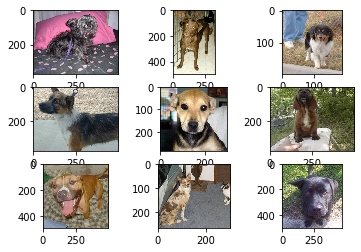

In [1]:
# plot dog photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'Train/'
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'dog.' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

# Convert Images to Np.Array

In [ ]:
# load dogs vs cats dataset, reshape and save to a new file
from os import listdir
import numpy as np
from keras.preprocessing.image import load_img as keras_load_img
from keras.preprocessing.image import img_to_array as keras_img_to_array

# define location of dataset
folder = 'train/'
photos, labels = list(), list()
# Get all the files from the directory train
for file in listdir(folder):

    # determine class
	output = 0.0 #Assume first it is dog
	if file.startswith('cat'): #Check Name of file
		output = 1.0

    # load image
	photo = keras_load_img(folder + file, target_size=(200, 200)) #Load file in low dimension resolution
	photo = keras_img_to_array(photo) 	# convert image to numpy array
    
    # store
	photos.append(photo) #Store that photo in a list
	labels.append(output) #Store its label in a list

    
# convert to a numpy arrays
photos = np.asarray(photos)
labels = np.asarray(labels)
print(photos.shape, labels.shape)
# save the reshaped photos
np.save('dogs_vs_cats_photos.npy', photos)
np.save('dogs_vs_cats_labels.npy', labels)

In [1]:
#Now to retrieve Numpy Array Saved Data

# load and confirm the shape
from numpy import load
photo = load('dogs_vs_cats_photos.npy')
label = load('dogs_vs_cats_labels.npy')
print(photo.shape, label.shape)

(2002, 200, 200, 3) (2002,)


In [2]:
import keras

Using TensorFlow backend.


In [3]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import SGD,Adam

In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))
#model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
#model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv2D(128, (3, 3), activation='relu'))       
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
# compile model
#opt = SGD(lr=0.001, momentum=0.9)
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
#Check Whether this random generator repeats value
for i in range(20):
    print(np.random.choice(20,replace=True))

In [7]:
#Shuffling the Data
import numpy as np
photoss = []
labelss = []
NewArray = np.random.choice(range(2001), 2001, replace=False)
for i in NewArray:
    photoss.append(photo[i])
    labelss.append(label[i])
    
    
photo  =np.asarray(photoss)
label = np.asarray(labelss)

In [8]:
photo.shape

(2001, 200, 200, 3)

In [9]:
print(label)
print(label.mean())

[0. 0. 0. ... 0. 1. 1.]
0.5002498750624688


In [ ]:
myepochs = 20
model.fit(x=photo,y=label,batch_size=200,epochs=myepochs,verbose=1)




Epoch 1/20





2001/2001 [==============================] - 302s 151ms/step - loss: 7.9461 - acc: 0.5002 3:54 - loss: 7.9007 - acc: 0.500 - ETA: 2:55 - loss: 7.8586 - acc


C:\Users\Cheema\.conda\envs\tfdeeplearning1\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (1.647524). Check your callbacks.
  % delta_t_median)


Epoch 2/20
2001/2001 [==============================] - 144s 72ms/step - loss: 7.9672 - acc: 0.5002
Epoch 3/20
1200/2001 [================>.............] - ETA: 1:07 - loss: 8.0775 - acc: 0.4933

# Working to See if Image Data Augmentation works  

In [15]:
from keras.preprocessing.image import ImageDataGenerator,array_to_img, img_to_array, load_img
#train_datagen = ImageDataGenerator(rescale=1.0/255.0,width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [29]:
img = load_img('training/train/Cat/cat.0.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
print(x.shape)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)
print(x.shape)



i = 0
for batch in datagen.flow(x, batch_size=1,save_to_dir='preview', save_prefix='cat', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

(374, 500, 3)
(1, 374, 500, 3)


In [ ]:
'''Does not work i dont know why'''
#datagen.flow(x, batch_size=20,save_to_dir='preview1', save_prefix='cat', save_format='jpeg')

Let see if same number of images work with Data Generator Augmentation

#  Now Model Making wih Image Data Generator Augmentation

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import SGD,Adam

Using TensorFlow backend.


In [8]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
#model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
#model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv2D(128, (3, 3), activation='relu'))       
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
# compile model
#opt = SGD(lr=0.001, momentum=0.9)
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [4]:

from keras.preprocessing.image import ImageDataGenerator,array_to_img, img_to_array, load_img
batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        'Training/Train',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        'Training/Validate',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [5]:
#I stopped at 9 epoch
history = model.fit_generator( train_generator, steps_per_epoch=2000 // batch_size, epochs=10,validation_data=validation_generator,validation_steps=800 // batch_size)
model.save_weights('first_try.h5')
summarize_diagnostics(history)




Epoch 1/10





125/125 [==============================] - 152s 1s/step - loss: 0.7146 - acc: 0.4840 - val_loss: 0.6931 - val_acc: 0.5413
Epoch 2/10
125/125 [==============================] - 127s 1s/step - loss: 0.6940 - acc: 0.4980 - val_loss: 0.6935 - val_acc: 0.5000
Epoch 3/10
125/125 [==============================] - 146s 1s/step - loss: 0.6788 - acc: 0.5635 - val_loss: 0.6701 - val_acc: 0.5725
Epoch 4/10
125/125 [==============================] - 149s 1s/step - loss: 0.6556 - acc: 0.6125 - val_loss: 0.6675 - val_acc: 0.5950
Epoch 5/10
125/125 [==============================] - 212s 2s/step - loss: 0.6217 - acc: 0.6585 - val_loss: 0.6250 - val_acc: 0.6587
Epoch 6/10
125/125 [==============================] - 216s 2s/step - loss: 0.5879 - acc: 0.6920 - val_loss: 0.5790 - val_acc: 0.7087
Epoch 7/10
125/125 [==============================] - 234s 2s/step - loss: 0.5636 - acc: 0.7140 - val_loss: 0.5989 - val_acc: 0.6887
Epoch 8/10
125/125 [==============================] - 233s 2s

KeyboardInterrupt: 

#  More Batch Size with Image Data Generator 

In [9]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1.0/255.0,width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

train_it = train_datagen.flow_from_directory('Training/Train',class_mode='binary', batch_size=64, target_size=(150, 150))
history = model.fit_generator(train_it, steps_per_epoch=len(train_it), epochs=10, verbose=1)
summarize_diagnostics(history)

Found 2000 images belonging to 2 classes.
Epoch 1/10
32/32 [==============================] - 200s 6s/step - loss: 0.7924 - acc: 0.4976
Epoch 2/10
32/32 [==============================] - 198s 6s/step - loss: 0.6909 - acc: 0.5244
Epoch 3/10
32/32 [==============================] - 200s 6s/step - loss: 0.6714 - acc: 0.5784
Epoch 4/10
32/32 [==============================] - 217s 7s/step - loss: 0.6710 - acc: 0.5977
Epoch 5/10
32/32 [==============================] - 202s 6s/step - loss: 0.6282 - acc: 0.6580
Epoch 6/10
32/32 [==============================] - 196s 6s/step - loss: 0.5765 - acc: 0.6944
Epoch 7/10
32/32 [==============================] - 203s 6s/step - loss: 0.5724 - acc: 0.7037
Epoch 8/10
32/32 [==============================] - 206s 6s/step - loss: 0.5316 - acc: 0.7305
Epoch 9/10
32/32 [==============================] - 202s 6s/step - loss: 0.5382 - acc: 0.7271
Epoch 10/10
32/32 [==============================] - 213s 7s/step - loss: 0.5297 - acc: 0.7290


In [14]:
#A function to draw a graph to show work of Model

from matplotlib import pyplot
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.show()
	pyplot.close()

# Pre-Trained Models

In [ ]:
'''We will use the VGG16 architecture, pre-trained on the ImageNet dataset --a model previously featured on this blog.
Because the ImageNet dataset contains several "cat" classes (persian cat, siamese cat...) and many "dog" classes among its
total of 1000 classes, this model will already have learned features that are relevant to our classification problem.
In fact, it is possible that merely recording the softmax predictions of the model over our data rather than
the bottleneck features would be enough to solve our dogs vs. cats classification problem extremely well. 
However, the method we present here is more likely to generalize well to a broader range of problems, 
including problems featuring classes absent from ImageNet.'''